In [25]:
%matplotlib inline 
   
import ipywidgets as widgets    
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

from IPython.display import clear_output

In [26]:

# create (int descriptor_type=AKAZE::DESCRIPTOR_MLDB, 
#         int descriptor_size=0, 
#         int descriptor_channels=3, 
#         float threshold=0.001f, 
#         int nOctaves=4, 
#         int nOctaveLayers=4, 
#         int diffusivity=KAZE::DIFF_PM_G2)


In [28]:
img = cv2.imread('chess.png') # Sudoku
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


threshold:


A Jupyter Widget

Total Keypoints: 
1164


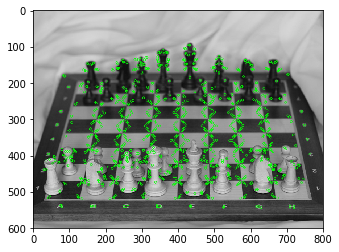

In [29]:
print('threshold:')
wThreshold = widgets.FloatSlider(
    value=0,
    min=0,
    max=0.1,
    step=0.001,
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)
display(wThreshold)


def paramsChanged(change):
    clear_output()

    print('threshold:')
    display(wThreshold)  
    
    image = cv2.imread('chess.png') # Sudoku
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    try:
        akaze = cv2.AKAZE_create()
        akaze.setThreshold(wThreshold.value)
        kp = akaze.detect(gray, None)
        print("Total Keypoints: ")
        print(len(kp))
        imgCorners = cv2.drawKeypoints(gray, kp, None, color=(0,255,0))
        plt.imshow(imgCorners)
        plt.show()
        
    except:
        clear_output()
        print('Invalid parametres. Try again')
        print('threshold:')
        display(wThreshold)
        

wThreshold.observe(paramsChanged, names='value')